# Schwachstellen erkennen

## Zielsetzung
1. Festlegen der Zielgrößen ...
- Liefertreue
- Auslastung
2. Optimieren der Zielgrößen ..

In [1]:
from projects.data_detectives.code.functions import *
from datetime import datetime
from pathlib import Path

No module named 'pyarrow'
Project Path: C:\Users\afreiter\PycharmProjects\ofact\projects\bicycle_world


## Parameter variieren

In [2]:
start_time_simulation = datetime(2025, 9, 2, 7)
resource_schedule = "schedule_s1"
work_in_process = 5  # to vary
update_simulation_input_parameters(start_time_simulation=start_time_simulation,
                                   work_in_process=work_in_process)

## Simulieren

In [11]:
!python -m projects.bicycle_world.scenarios.current.main

No module named 'pyarrow'
Project Path: C:\Users\afreiter\PycharmProjects\ofact\projects\bicycle_world
STATUS: Starting Execution
Platform name: Windows
2025-08-29 15:20:43.712833 Execute Simulation
Digital Twin updated
Environment Initialized
correction_needed available
agents from excel
Agents model created
Agents Model Initialized
2025-08-29 15:20:45.200283 Register Agents
Individualize Agents
Time limit: (datetime.datetime(2025, 9, 2, 7, 0), datetime.datetime(2025, 9, 2, 17, 0), 19)
...[agent administration] removing all existing users from the xmpp-server (http://127.0.0.1:9090)
...[agent administration] Create Agents
[Agent Administration] Start agent main_part_agv_nsr_agentfactory_agents 

[main_part_agv_nsr_agentfactory_agents] Hello World! I'm agent main_part_agv_nsr_agentfactory_agents@127.0.0.1 
 TransportAgent 

[Agent Administration] Start agent individual_part_agv_nsr_agentfactory_agents 

[individual_part_agv_nsr_agentfactory_agents] Hello World! I'm agent individual_par

C:\Users\afreiter\PycharmProjects\ofact\ofact\twin\change_handler\Observer.py:135: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.utilisation_df = pd.concat([


# Analysieren

In [8]:
# simuliertes Szenario einladen
# resource_schedule = "schedule_s1"
# work_in_process = 5
scenario = f"{resource_schedule}_{int(work_in_process)}"

state_model_file_path = Path(PROJECT_PATH + f"/scenarios/current/results/{scenario}.pkl")
state_model: StateModel = deserialize_state_model(state_model_file_path, persistence_format="pkl", dynamics=True)

Platform name: Windows
Problem: id.27233


In [9]:
schedule = get_schedule(state_model)

AnalyticsDataBase instantiation finished


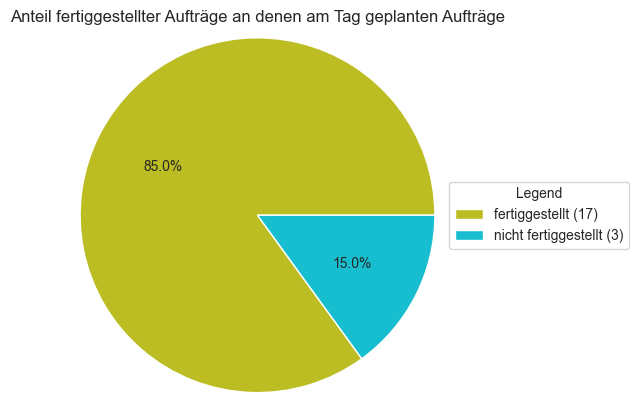

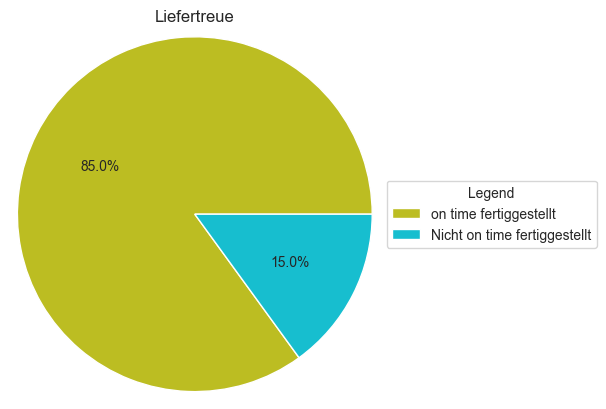

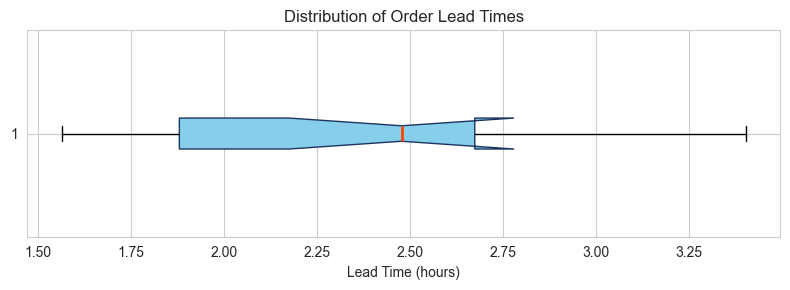

In [10]:
# Overall KPIs
get_order_finished(state_model)  # share of orders finished
get_delivery_reliability(state_model)  # delivery reliability
get_order_lead_time(state_model)  # order lead time
actual_resources_working_hours, planned_resources_working_hours = (
    get_schedule_time_equivalent(schedule=schedule,
                                 aggregated=["Main Part AGV"]))  # capacity utilization

In [7]:
# Detailed view
schedule = plot_resource_schedule(schedule)

In [17]:
orders = state_model.get_orders()
for order in orders:
    print(order.identification, "-", order.release_date_actual, "-", order.delivery_date_planned, "-", order.delivery_date_actual)
    if order.delivery_date_actual and order.release_date_actual:
        print(order.delivery_date_actual - order.release_date_actual)

22650 - 2025-08-29 07:00:00 - 2025-08-29 11:00:00 - 2025-08-29 10:49:52
3:49:52
22651 - 2025-08-29 07:00:00 - 2025-08-29 11:00:00 - 2025-08-29 10:32:46
3:32:46
22652 - 2025-08-29 07:00:00 - 2025-08-29 11:00:00 - 2025-08-29 10:01:57
3:01:57
22653 - 2025-08-29 07:00:00 - 2025-08-29 11:00:00 - 2025-08-29 09:28:19
2:28:19
22654 - 2025-08-29 07:00:00 - 2025-08-29 12:00:00 - 2025-08-29 10:23:40
3:23:40
22655 - 2025-08-29 09:28:19 - 2025-08-29 12:00:00 - 2025-08-29 11:29:13
2:00:54
22656 - 2025-08-29 10:32:46 - 2025-08-29 13:00:00 - 2025-08-29 13:15:34
2:42:48
22657 - 2025-08-29 10:49:52 - 2025-08-29 13:00:00 - 2025-08-29 13:24:29
2:34:37
22658 - 2025-08-29 10:01:57 - 2025-08-29 13:00:00 - 2025-08-29 11:34:59
1:33:02
22659 - 2025-08-29 10:23:40 - 2025-08-29 13:00:00 - 2025-08-29 12:49:44
2:26:04
22660 - 2025-08-29 12:49:44 - 2025-08-29 15:00:00 - 2025-08-29 15:13:35
2:23:51
22661 - 2025-08-29 11:29:13 - 2025-08-29 15:00:00 - 2025-08-29 13:54:08
2:24:55
22662 - 2025-08-29 11:34:59 - 2025-08-29